In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
%matplotlib inline
plt.rcParams['figure.figsize'] = (11.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [13]:
def load_CIFAR_batch(filename):
  """加载单个文件"""
  with open(filename, 'rb') as f:
    datadict = pickle.load(f, encoding='bytes')
    X = datadict[b'data']
    Y = datadict[b'labels']
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    Y = np.array(Y)
    return X, Y
def load_CIFAR10_classes(filename):
    with open(filename, 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
        labels_name = []
        for i in dict[b'label_names']:
            labels_name.append(i.decode('utf-8'))
    return labels_name
def load_CIFAR10(ROOT):
  xs = []
  ys = []
  for b in range(1,6):
    f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
    X, Y = load_CIFAR_batch(f)
    xs.append(X)
    ys.append(Y)    
  Xtr = np.concatenate(xs)
  Ytr = np.concatenate(ys)
  del X, Y
  Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
  labels_name = load_CIFAR10_classes(os.path.join(ROOT, 'batches.meta'))
  return Xtr, Ytr, Xte, Yte, labels_name

In [14]:
data_path = "./cifar-10-python/cifar-10-batches-py/"
X_train, y_train, X_test, y_test,labels_name = load_CIFAR10(data_path)

print('训练集：', X_train.shape)
print('训练集标签：',y_train.shape)
print('测试集：', X_test.shape)
print('测试集标签：', y_test.shape)
print('标签集合：', labels_name)

训练集： (50000, 32, 32, 3)
训练集标签： (50000,)
测试集： (10000, 32, 32, 3)
测试集标签： (10000,)
标签集合： ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


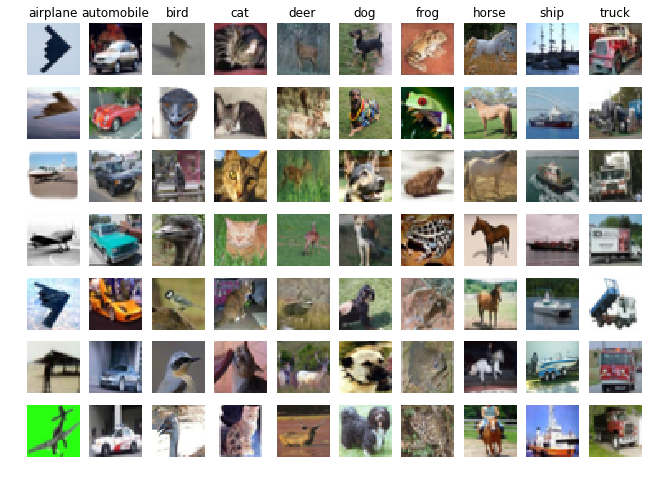

In [15]:
num_classes = len(labels_name)
samples_per_class = 7
for y, cls in enumerate(labels_name):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [16]:
num_training = 5000
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [18]:
from KNN import KNearestNeighbor
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=4, num_loops=2)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 136 / 500 correct => accuracy: 0.272000
